In [47]:
# Importing necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
import random
from sklearn.linear_model import Ridge

In [2]:
diabetes=load_diabetes()
x=diabetes.data
y=diabetes.target

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [4]:
x_train

array([[ 0.03081083,  0.05068012,  0.03259528, ...,  0.03430886,
         0.06301517,  0.00306441],
       [ 0.07440129, -0.04464164,  0.08540807, ..., -0.00259226,
         0.00620674,  0.08590655],
       [-0.05637009,  0.05068012, -0.0105172 , ...,  0.03430886,
         0.02060939,  0.0569118 ],
       ...,
       [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
        -0.01090325, -0.0010777 ],
       [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
        -0.03845972, -0.03835666],
       [-0.09269548, -0.04464164,  0.02828403, ..., -0.03949338,
        -0.00514219, -0.0010777 ]])

In [5]:
# Define a custom class for MiniBatch Gradient Descent (MBGD) optimization
class MiniBatch():

    # Constructor method to initialize the learning rate (lr) and number of epochs and batch_size
    def __init__(self, lr=0.1, epochs=100,batch_size=35):
        self.coef_ = None  # Coefficients for the linear model (weights)
        self.intercept_ = None  # Intercept (bias) term for the linear model
        self.lr = lr  # Learning rate for gradient descent
        self.epochs = epochs  # Number of iterations for training
        self.batch_size=batch_size # batch_size
    # Method to train the model on the training data using MBGD
    def fitmodel(self, X_train, Y_train):
        self.intercept_ = 0  # Initialize intercept as 0
        self.coef_ = np.ones(X_train.shape[1])  # Initialize coefficients as ones

        # Loop through the number of epochs
        for i in range(self.epochs):
            # Loop through each training sample
            for j in range(X_train.shape[0]//self.batch_size):
                # Randomly select an batch for MBGD calculation
                id =random.sample(range(X_train.shape[0]),self.batch_size)

                # Calculate the predicted value for the randomly selected sample
                y_predicted = np.dot(X_train[id], self.coef_) + self.intercept_

                # Compute the gradient (derivative) for the intercept term
                intercept_der = -2 * np.mean(Y_train[id] - y_predicted)
                # Update the intercept using the learning rate and gradient
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                # Compute the gradient (derivative) for the coefficients
                coef_der = -2 * np.dot((Y_train[id] - y_predicted), X_train[id])/self.batch_size
                # Update the coefficients using the learning rate and gradient
                self.coef_ = self.coef_ - (self.lr * coef_der)

        # Print the final intercept and coefficients after training
        print(self.intercept_, self.coef_)

    # Method to make predictions on test data using the trained model
    def predict(self, X_test):
        # Return the predicted values by applying the linear model (dot product)
        return np.dot(X_test, self.coef_) + self.intercept_


In [6]:
mbg=MiniBatch()

In [7]:
mbg.fitmodel(x_train,y_train)

154.17922642322077 [  53.61123112  -31.66976841  237.6786327   170.39312068   29.79035441
   16.05470225 -142.51364772  132.79339574  186.06918114  117.40804146]


In [8]:
y_MBGD=mbg.predict(x_test)

In [9]:
r2_score(y_test,y_MBGD)

0.40786296967917723

In [10]:
df=pd.read_csv('CarPricesPrediction.csv')

In [11]:
data=df.iloc[:,3:5]
target=df.iloc[:,6:]

In [12]:
target

,Price
0,19094.75
1,27321.10
2,23697.30
3,18251.05
4,19821.85
...,...
995,24548.50
996,26969.70
997,20507.55
998,31414.90


In [13]:
from sklearn.preprocessing import StandardScaler
scler=StandardScaler()

In [14]:
scaled_data=scler.fit_transform(data)

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,target,test_size=0.3,random_state=42)

In [16]:
Lr=LinearRegression()
Lr.fit(X_train,Y_train)

LinearRegression()

In [74]:
Rg=Ridge(alpha=1000)
Rg.fit(X_train,Y_train)

Ridge(alpha=1000)

In [75]:
Y_rg=Rg.predict(X_test)

In [76]:
print(r2_score(Y_test,Y_rg))

0.647367890227508


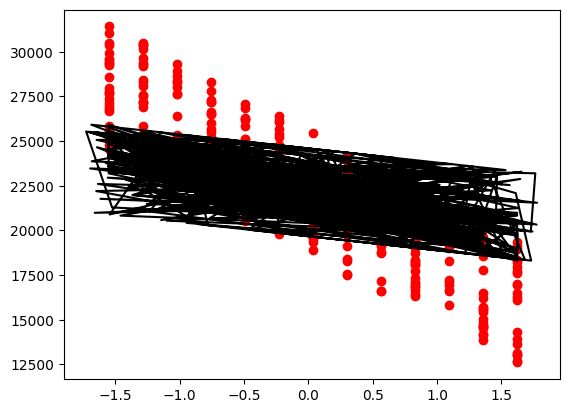

In [78]:
plt.scatter(X_test[:,0],Y_test,color="red")
plt.scatter(X_test[:,1],Y_test,color="blue")
plt.plot(X_test,Y_rg,color="black")

In [20]:
Y_pred=Lr.predict(X_test)

In [21]:
r2_score(Y_test,Y_pred)

0.9999999997555501

In [22]:
X_train.shape

(700, 2)

##### Custom Mini Batch Gardient class for car_price prediction

In [23]:
class MGradient():

    def __init__(self,lr=0.1,epochs=10,batch_size=70):
        self.coef_ = None
        self.intercept_ =None
        self.epochs=epochs
        self.batch_size=batch_size
        self.lr=lr

    def Fitmodel(self,x,y):
        self.coef_ = np.ones(x.shape[1])
        self.intercept_=0

        for i in range(self.epochs):
            for j in range(x.shape[0]//self.batch_size):
                idx=random.sample(range(x.shape[0]),self.batch_size)
                y_predicted=np.dot(x[idx],self.coef_)+self.intercept_
                y_predicted = np.array(y_predicted).flatten()
                y_batch = np.array(Y_train.iloc[idx]).flatten()
                intercept_der=-2*np.mean(y_batch-y_predicted)
                self.intercept_=self.intercept_-(self.lr*intercept_der)

                coef_der=-2*np.dot((y_batch-y_predicted),x[idx])/self.batch_size
                self.coef_=self.coef_-(self.lr*coef_der)
        print(self.intercept_,self.coef_)

    def predict(self,test_data):
        return np.dot(test_data,self.coef_)+self.intercept_

In [24]:
mg=MGradient(0.1,50,10)

In [25]:
mg.Fitmodel(X_train,Y_train)

22195.194479452588 [-3780.57710297 -1991.12180989]


In [26]:
mgpred=mg.predict(X_test)

In [27]:
r2_score(Y_test,mgpred)

0.999999999755361

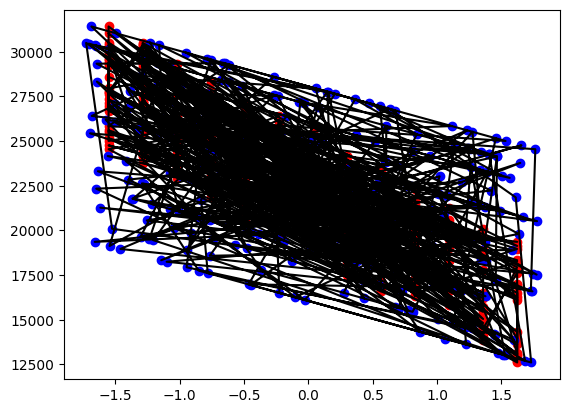

In [45]:
plt.scatter(X_test[:,0],Y_test,color="red")
plt.scatter(X_test[:,1],Y_test,color="blue")
plt.plot(X_test,mgpred,color="black")

In [28]:
idx=random.sample(range(X_train.shape[0]),70)

In [29]:
X_train[idx]

array([[ 0.82923814,  1.5425282 ],
       [ 0.03570882,  0.45381753],
       [ 0.82923814, -1.63835016],
       [-1.55134981,  0.39267093],
       [-0.49331073, -1.58245188],
       [ 0.30021859, -0.01157459],
       [ 1.35825768,  0.69802722],
       [ 1.62276745,  1.18396057],
       [-0.7578205 , -1.23239706],
       [ 0.82923814,  0.68881129],
       [-0.7578205 ,  1.4415296 ],
       [-0.49331073, -0.86948513],
       [ 0.30021859,  1.47673598],
       [-1.55134981, -0.37267848],
       [ 1.35825768,  1.77917932],
       [-0.22880095,  1.10726994],
       [ 1.35825768,  1.10794795],
       [ 1.09374791, -1.18963211],
       [ 1.35825768, -0.90639909],
       [-1.02233027, -1.45074187],
       [ 0.03570882,  0.7798155 ],
       [-0.22880095, -0.2223106 ],
       [-1.28684004,  0.87295419],
       [ 1.09374791,  0.67630574],
       [-0.7578205 ,  0.50459305],
       [ 1.09374791, -1.67749905],
       [-0.22880095, -1.55171536],
       [-1.28684004,  0.19351134],
       [-1.02233027,

In [30]:
coef_=np.ones(X_train.shape[1])
intercept_=0

In [31]:
y_predicted=np.dot(X_train[idx],coef_)+intercept_
                

In [32]:
Y_train.iloc[idx]

,Price
657,15988.80
71,21156.45
771,22322.40
906,27278.40
167,27211.10
...,...
164,24699.35
491,26463.40
171,25063.85
336,28657.20


In [33]:
y_sample=y_predicted.reshape(-1,1)

In [34]:
y_sample.shape

(70, 1)

In [35]:
y_predicted = np.array(y_predicted).flatten()
y_batch = np.array(Y_train.iloc[idx]).flatten()

In [36]:
y_batch

array([15988.8 , 21156.45, 22322.4 , 27278.4 , 27211.1 , 21083.2 ,
       15670.4 , 13702.85, 27514.  , 17688.65, 22190.  , 25791.5 ,
       18119.9 , 28802.3 , 13517.7 , 20855.55, 14854.2 , 20428.85,
       18865.  , 28948.65, 20507.55, 23502.7 , 25322.  , 16713.65,
       24055.45, 21400.35, 26149.9 , 26674.95, 25099.8 , 22461.1 ,
       18321.95, 21606.4 , 27838.95, 15483.95, 22937.25, 20766.05,
       14343.45, 28179.8 , 23113.  , 14197.5 , 20655.9 , 23019.05,
       26081.2 , 17102.7 , 25885.4 , 27111.9 , 17693.25, 26018.55,
       20349.2 , 27044.1 , 18772.75, 20780.35, 26935.75, 15943.75,
       28918.2 , 18951.1 , 25805.7 , 18806.85, 17274.65, 21553.55,
       28792.25, 26341.85, 15827.7 , 21254.2 , 26305.1 , 24699.35,
       26463.4 , 25063.85, 28657.2 , 30526.55])

In [37]:
intercept_der=-2*np.mean(Y_train.iloc[idx]-y_sample)

In [70]:
intercept_der

-44985.52494336996

In [38]:
class GDefault():
    def __init__(self, lr=0.1, epochs=10, batch_size=70):
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.batch_size = batch_size
        self.lr = lr

    def Fitmodel(self, x, y):
        # Convert to numpy array if input is pandas DataFrame or Series
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = x.values
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.values

        self.coef_ = np.ones(x.shape[1])  # Initialize coefficients
        self.intercept_ = 0  # Initialize intercept

        for i in range(self.epochs):
            for j in range(x.shape[0] // self.batch_size):
                # Randomly select batch indices
                idx = random.sample(range(x.shape[0]), self.batch_size)

                # Select the batch of data
                x_batch = x[idx]
                y_batch = y[idx].flatten()  # Flatten to 1D array

                # Calculate predictions
                y_predicted = np.dot(x_batch, self.coef_) + self.intercept_

                # Compute the gradients
                intercept_der = -2 * np.mean(y_batch - y_predicted)
                coef_der = -2 * np.dot((y_batch - y_predicted), x_batch)/self.batch_size

                # Update the intercept and coefficients
                self.intercept_ -= self.lr * intercept_der
                self.coef_ -= self.lr * coef_der

        print(f"Intercept: {self.intercept_}, Coefficients: {self.coef_}")

    def predict(self, test_data):
        # Convert test data to numpy array if it's a pandas DataFrame
        if isinstance(test_data, pd.DataFrame) or isinstance(test_data, pd.Series):
            test_data = test_data.values
        return np.dot(test_data, self.coef_) + self.intercept_



In [39]:
default=GDefault(0.1,50,35)

In [40]:
default.Fitmodel(x_train,y_train)

Intercept: 153.30060076495343, Coefficients: [ 37.58730162  -8.17444497 145.09321227 106.37107502  29.45207027
  21.58385336 -90.83898149  92.80046074 121.19050686  85.84524515]
